1. DOWNLOAD THE DATASET

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. IMAGE AUGMENTATION

In [8]:
#!pip install tensorflow
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders

In [11]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/IBM ASSIGNMENT-3/flowers', output="/content/drive/MyDrive/IBM ASSIGNMENT-3/flowers/output", seed=1337, ratio=(.8,0.1,0.1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





Copying files: 0 files [00:00, ? files/s]


Copying files: 1 files [00:00,  5.19 files/s]


Copying files: 2 files [00:00,  4.41 files/s]


Copying files: 3 files [00:00,  4.25 files/s]


Copying files: 4 files [00:00,  4.24 files/s]


Copying files: 5 files [00:01,  4.20 files/s]


Copying files: 6 files [00:01,  4.12 files/s]


Copying files: 7 files [00:01,  4.13 files/s]


Copying files: 8 files [00:01,  4.21 files/s]


Copying files: 9 files [00:08,  2.09s/ files]


Copying files: 14 files [00:08,  1.51 files/s]


Copying files: 21 files [00:08,  3.48 files/s]


Copying files: 29 files [00:08,  6.51 files/s]


Copying files: 36 files [00:08,  9.87 files/s]


Copying files: 45 files [00:08, 15.45 files/s]


Copying files: 52 files [00:08, 20.20 files/s]


Copying files: 59 files [00:08, 25.69 files/s]


Copying files: 67 files [00:08, 33.03 files/s]


Copying files: 74 files [00:09, 38.08 files/s]


Copying files: 82 files [00:09, 45.48 files/s]


Copying files: 89 files [00:09,

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM ASSIGNMENT-3/flowers/output/train',target_size=(220,220),class_mode= 'categorical', batch_size=100)
xtest = test_datagen.flow_from_directory('/content/drive/MyDrive/IBM ASSIGNMENT-3/flowers/output/test',target_size=(220,220),class_mode= 'categorical', batch_size=100)



Found 3453 images belonging to 6 classes.
Found 436 images belonging to 6 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense



3. CREATE MODEL

In [26]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(220,220,3)))

4. ADD LAYERS


In [27]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

4. COMPILE THE MODEL

In [28]:
model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy'])

5. FIT THE MODEL

In [29]:
model.fit(xtrain, steps_per_epoch=len(xtrain), epochs=30,validation_data=xtest, validation_steps=len(xtest))

Epoch 1/30


InvalidArgumentError: ignored

6. SAVE THE MODEL

In [30]:
model.save('/content/drive/MyDrive/IBM ASSIGNMENT-3/flowers_predict.h5')

7. TEST THE MODEL


In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [33]:
img = image.load_img('/content/drive/MyDrive/IBM ASSIGNMENT-3/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(220,220))

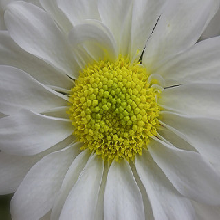

In [34]:
img

In [35]:
x= image.img_to_array(img)

In [36]:
x

array([[[135., 135., 133.],
        [142., 142., 142.],
        [145., 145., 145.],
        ...,
        [154., 154., 152.],
        [153., 153., 153.],
        [148., 148., 148.]],

       [[134., 134., 132.],
        [141., 141., 139.],
        [144., 144., 144.],
        ...,
        [154., 154., 152.],
        [153., 153., 153.],
        [148., 148., 148.]],

       [[133., 133., 131.],
        [141., 141., 139.],
        [144., 144., 144.],
        ...,
        [153., 153., 151.],
        [153., 153., 153.],
        [146., 146., 146.]],

       ...,

       [[ 45.,  48.,  27.],
        [ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        ...,
        [130., 126., 125.],
        [130., 126., 125.],
        [129., 125., 124.]],

       [[ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        ...,
        [131., 127., 126.],
        [130., 126., 125.],
        [130., 126., 125.]],

       [[ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        [ 44.,  

In [37]:
x=np.expand_dims(x,axis=0)

In [38]:
model.predict(x)

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.5679634e-21,
        1.2637054e-35]], dtype=float32)

In [39]:
op=['daisy','dandelion','rose','sunflower','tulip']

In [40]:
pred = np.argmax(model.predict(x))

In [41]:
op[pred]

'daisy'